In [1]:
from src.data import load_karate_club, load_cora_dataset
from src.experiments import show_karate_gt_vs_prediction, report_metrics, draw_dot_plot, rearrange_tau, write_em_results, load_em_results
from src.em import em_algorithm
from src.metrics import SBM_clustering_coefficient

import networkx as nx
import numpy as np
import os
import time
from matplotlib import pyplot as plt

/home/theilo/Software/Miniconda/envs/PGM/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/theilo/Software/Miniconda/envs/PGM/lib/python3.11/site-packages/graspologic/models/edge_swaps.py:215: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  _edge_swap_numba = nb.jit(_edge_swap, nopython=False)


# Zachary's Karate Club dataset

In [41]:
X, y = load_karate_club()
G = nx.from_numpy_array(X)
Q = 2

Number of nodes: 34
Number of edges: 78


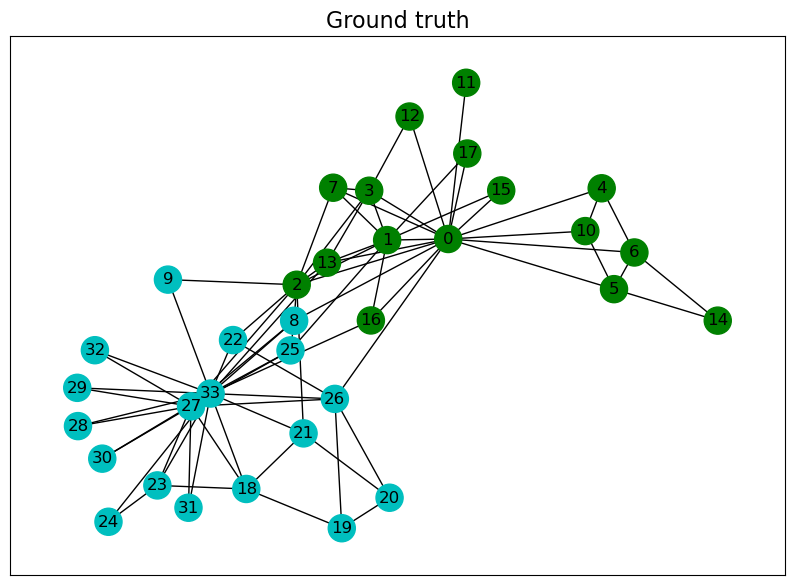

In [3]:
# Plot ground truth
pos = nx.spring_layout(G, seed=42)
plt.rcParams['figure.facecolor'] = 'white'
plt.figure(figsize=(10, 7))
color_list = ["g", "c", "r"]
node_colors = [color_list[i] for i in y]
nx.draw_networkx(G, node_color=node_colors, pos=pos, node_size=380)
plt.title("Ground truth", fontsize=16)
plt.savefig("images/karate_club_gt")

In [42]:
alpha_pred, pi_pred, tau_pred, _ = em_algorithm(X, Q=Q, n_init=10, iterations=100)

EM iteration 100/100 | Max LL (1 paths) -193.531652


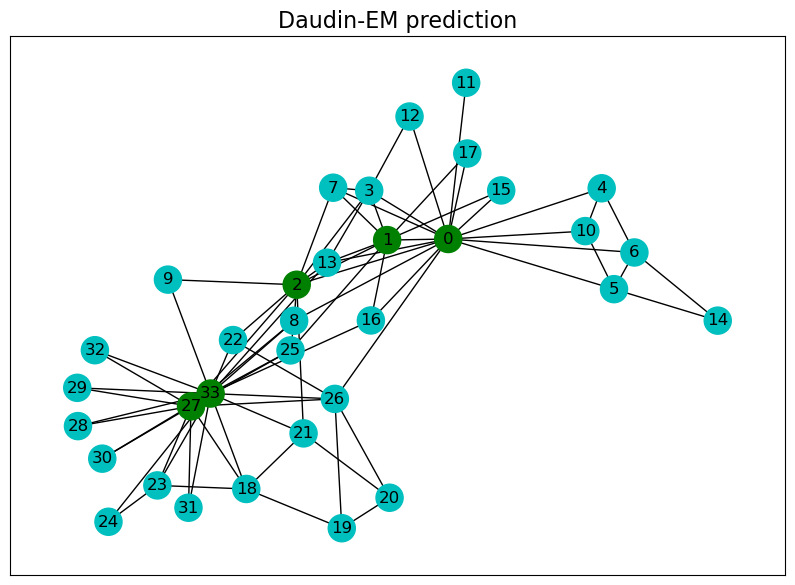

In [43]:
# Plot prediction
pos = nx.spring_layout(G, seed=42)
plt.rcParams['figure.facecolor'] = 'white'
plt.figure(figsize=(10, 7))
color_list = ["g", "c", "r"]
node_colors = [color_list[i] for i in np.argmax(tau_pred, axis=1)]
nx.draw_networkx(G, node_color=node_colors, pos=pos, node_size=380)
plt.title("Daudin-EM prediction", fontsize=16)
plt.savefig("images/karate_club_sbm")

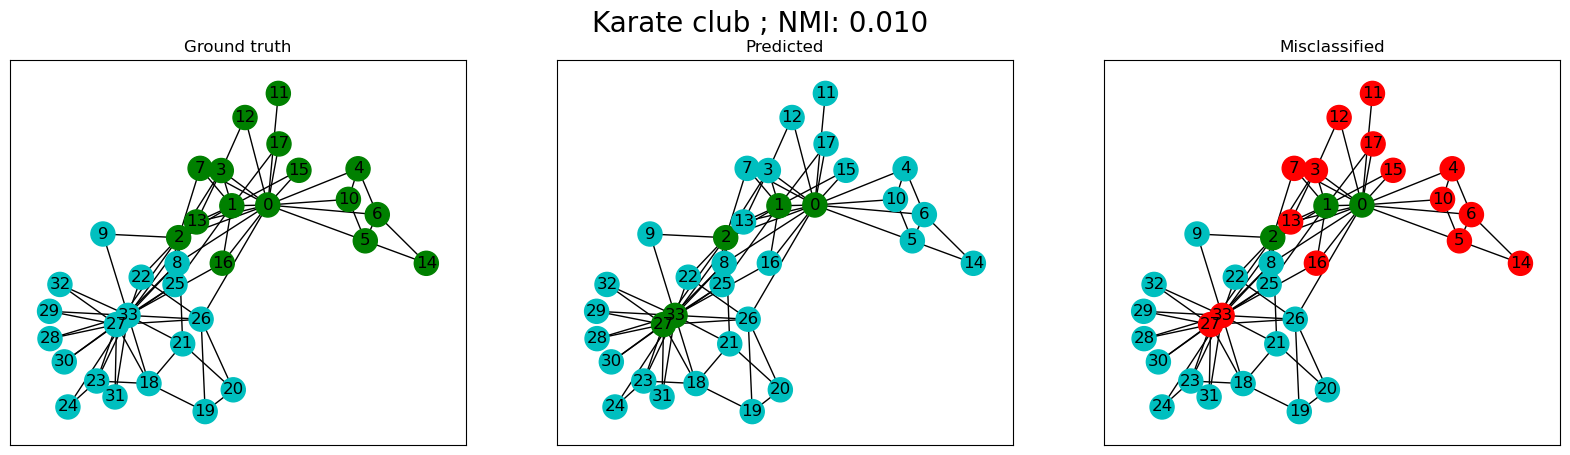

In [44]:
show_karate_gt_vs_prediction(G, tau_pred, y)

In [45]:
report_metrics(X, tau_pred, y, Q)

NMI: 0.010
Rand index: 0.492
Gt Modularity: 0.371
Pred Modularity: -0.208
Graph clustering coefficient: 0.2556818181818182
Per class gt clustering coefficients: [0.41899441340782123, 0.25961538461538464]
Per class pred clustering coefficients: [0.5, 0.23076923076923078]


In [46]:
print("Clustering coefficient as computed using the SBM model:", SBM_clustering_coefficient(alpha_pred, pi_pred))

Clustering coefficient as computed using the SBM model: 0.21115203954372735


# Cora dataset

In [8]:
X, y = load_cora_dataset()
Q = 7

Number of nodes: 2708
Number of edges: 5278


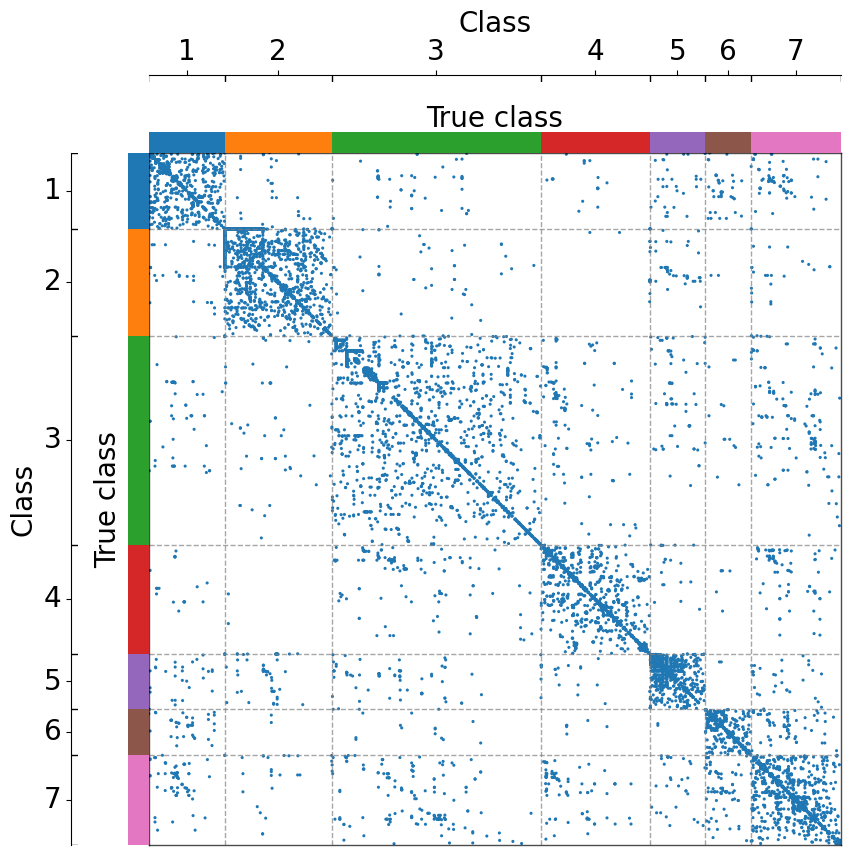

In [14]:
# Plot ground truth clustering
draw_dot_plot(X, y + 1, y + 1, save_as="cora_gt")

In [36]:
run_or_load = "load"
write = False

In [37]:
if run_or_load == "run":
    # Run EM algorithm
    t0 = time.time()
    alpha_pred, pi_pred, tau_pred, _ = em_algorithm(X, Q=Q, n_init=10, iterations=100)
    print("running time:", time.time() - t0)
    if write == True:
        write_em_results(alpha_pred, pi_pred, tau_pred, path=os.path.join('EM', 'cora'))
else:
    alpha_pred, pi_pred, tau_pred = load_em_results(path=os.path.join('EM', 'cora'))

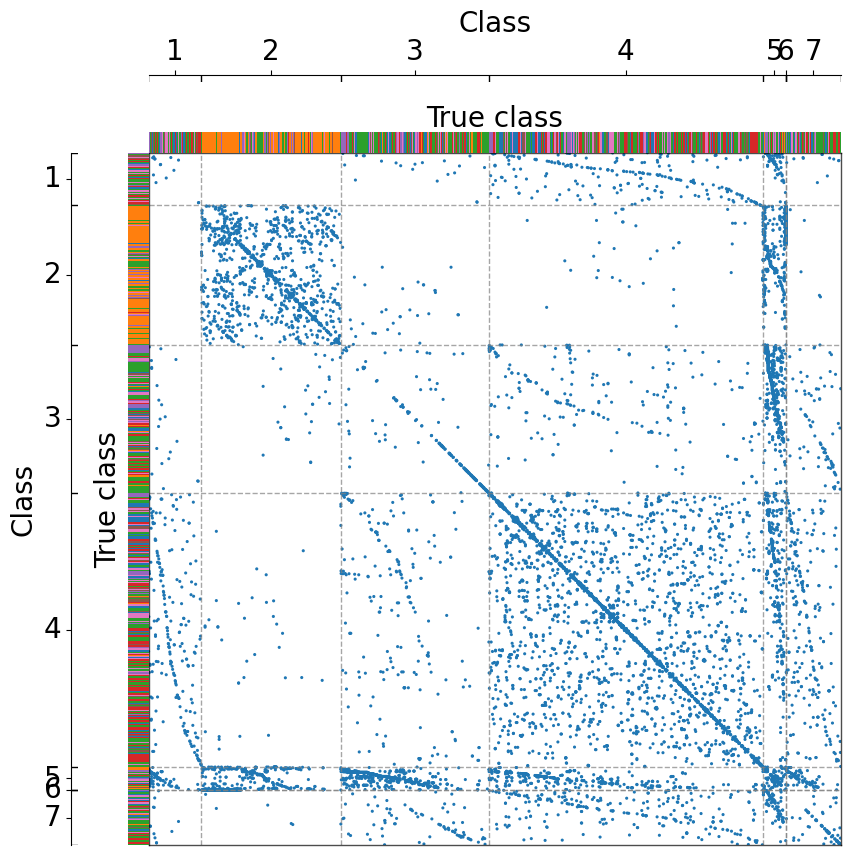

In [17]:
# Plot result
rearranged_tau_pred = rearrange_tau(tau_pred, y, Q=Q)
classification = rearranged_tau_pred.argmax(axis=1) + 1
draw_dot_plot(X, classification, y + 1, save_as="cora_SBM")

In [15]:
report_metrics(X, rearranged_tau_pred, y, Q)

NMI: 0.152
Rand index: 0.695
Gt Modularity: 0.640
Pred Modularity: 0.222
Graph clustering coefficient: 0.09349725626661058
Per class gt clustering coefficients: [0.18568665377176016, 0.05947263745428883, 0.12287887653598596, 0.2283628779979145, 0.10072090628218332, 0.22003577817531306, 0.1627731725697061]
Per class pred clustering coefficients: [0, 0.15644699140401147, 0.0, 0.2922744462452728, 0.2545454545454545, 0, 0.8571428571428571]


In [38]:
print("Clustering coefficient as computed using the SBM model:", SBM_clustering_coefficient(alpha_pred, pi_pred))

Clustering coefficient as computed using the SBM model: 0.006167127955099008
